<a href="https://colab.research.google.com/github/Rahafhosari/DataScience2024-2025/blob/master/resampling_datetime_data_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Resampling Data
Name : Rahaf Hosari

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)
pd.set_option("display.max_info_rows", 800)
pd.set_option('display.max_info_columns',800)
from sklearn import set_config
set_config(transform_output='pandas')

## Load Data

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("emmanuelfwerr/london-weather-data")

# print("Path to dataset files:", path)

100%|██████████| 226k/226k [00:00<00:00, 61.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/emmanuelfwerr/london-weather-data/versions/1


In [ ]:
path = '/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Resampling/london_weather_MODIFIED - london_weather_MODIFIED (2).csv'
df = pd.read_csv(path)
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


1. Convert the date column to datetime dtype.


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

2. Set the date column as the index.

In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [ ]:
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   cloud_cover       float64
 1   sunshine          float64
 2   global_radiation  float64
 3   max_temp          float64
 4   mean_temp         float64
 5   min_temp          float64
 6   precipitation     float64
 7   pressure          float64
 8   snow_depth        float64
dtypes: float64(9)
memory usage: 1.2 MB


Filter out only the required data: <br>
-- Keep only data from the year 2000 or later. <br>

2. Keep only the following features:
- precipitation
- mean_temp
- min_temp
- max_temp
- snow_depth

In [ ]:
# Needed Columns
required_cols = ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']

In [ ]:
df.index.year.value_counts()

,count
date,
1980,366
1984,366
1988,366
2012,366
2020,366
2016,366
2000,366
2004,366
1996,366


In [ ]:
#Filter Out Data from Year 2000 and later
df_filtered = df.loc[df.index.year >= 2000, required_cols]
df_filtered.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [ ]:
output_path = '/content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Resampling/filtered_data.csv'
df_filtered.to_csv(output_path)

# Optionally, print the path to confirm
print(f"Data saved to {output_path}")

Data saved to /content/drive/MyDrive/AXSOSACADEMY/07-TimeSeriesAnalysis/Resampling/filtered_data.csv


In [ ]:
df_filtered.index.year.value_counts()

,count
date,
2000,366
2004,366
2020,366
2012,366
2008,366
2016,366
2003,365
2001,365
2002,365


> We can see Years in the filtered data set ranges from year 2000 till 2019

In [ ]:
df_filtered.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


Impute Missing Values <br/>
- forward-filling
- backward-filling
- interpolation

In [ ]:
df_filtered.describe()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
count,7281.000000,7252.000000,7285.000000,7281.000000,5919.000000
mean,1.723376,11.907308,8.000480,15.810850,0.023146
std,3.675610,5.669191,5.242933,6.526161,0.306467
min,0.000000,-4.100000,-9.400000,-1.200000,0.000000
25%,0.000000,7.600000,4.100000,10.800000,0.000000
50%,0.000000,11.800000,8.200000,15.600000,0.000000
75%,1.800000,16.400000,12.100000,20.700000,0.000000
max,51.600000,29.000000,22.300000,37.900000,12.000000


In [ ]:
df_filtered.isna().sum()

,0
precipitation,390
mean_temp,419
min_temp,386
max_temp,390
snow_depth,1752


In [ ]:
#Another null Check
df_filtered.isnull().sum()

,0
precipitation,390
mean_temp,419
min_temp,386
max_temp,390
snow_depth,1752


In [ ]:
# Using Interpolation to Impute Missing Values
df_filtered = df_filtered.interpolate() #Linear Interpolation

In [ ]:
# df_filtered['precipitation'] = df_filtered['precipitation'].fillna(df_filtered['precipitation'].mean())
# df_filtered['mean_temp'] = df_filtered['mean_temp'].fillna(df_filtered['mean_temp'].mean())
# df_filtered['min_temp'] = df_filtered['min_temp'].fillna(df_filtered['min_temp'].mean())
# df_filtered['max_temp'] = df_filtered['max_temp'].fillna(df_filtered['max_temp'].mean())
# df_filtered['snow_depth'] = df_filtered['snow_depth'].fillna(df_filtered['snow_depth'].mean())

# df_filtered.loc[:, 'precipitation'] = df_filtered['precipitation'].fillna(df_filtered['precipitation'].mean())
# df_filtered.loc[:, 'mean_temp'] = df_filtered['mean_temp'].fillna(df_filtered['mean_temp'].mean())
# df_filtered.loc[:, 'min_temp'] = df_filtered['min_temp'].fillna(df_filtered['min_temp'].mean())
# df_filtered.loc[:, 'max_temp'] = df_filtered['max_temp'].fillna(df_filtered['max_temp'].mean())
# df_filtered.loc[:, 'snow_depth'] = df_filtered['snow_depth'].fillna(df_filtered['snow_depth'].mean())


In [ ]:
#Confirming Missing Values Count
df_filtered.isna().sum().sum()

np.int64(0)

# Visualization

In [ ]:
# df_copy = df_filtered.copy()

In [ ]:
df_filtered.shape

(7671, 5)

In [ ]:
df_filtered.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=7671, freq=None)

Q1: What month had the most precipitation between 2000 through 2010?

In [ ]:
#Filter data betweem 2000 and 2010
temp_df = df_filtered['2000-01-01':'2010-12-31']

In [ ]:
temp_df.shape

(4018, 5)

In [ ]:
temp_df.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq=None)

In [ ]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2000-01-01 to 2010-12-31
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   precipitation  float64
 1   mean_temp      float64
 2   min_temp       float64
 3   max_temp       float64
 4   snow_depth     float64
dtypes: float64(5)
memory usage: 188.3 KB


In [ ]:
#Resample Data by Month
monthly_precipitation = temp_df['precipitation'].resample('ME').sum()

In [ ]:
monthly_precipitation.head()

,precipitation
date,
2000-01-31,14.5
2000-02-29,64.8
2000-03-31,13.9
2000-04-30,82.5
2000-05-31,78.0


In [ ]:
#Find the date and corresponding value for the max precipitation.
max_precipitation_date = monthly_precipitation.idxmax()
max_precipitation_value = monthly_precipitation.max()

print(f"The month with the most precipitation between 2000 and 2010 was {max_precipitation_date.month_name()}, with a total of {max_precipitation_value} inches of precipitation.")
print(f"Max Precipitation occurred in {max_precipitation_date.strftime('%B %Y')} with {max_precipitation_value:.2f} mm.")

The month with the most precipitation between 2000 and 2010 was October, with a total of 152.7 inches of precipitation.
Max Precipitation occurred in October 2000 with 152.70 mm.


Iteration One of Visualizing

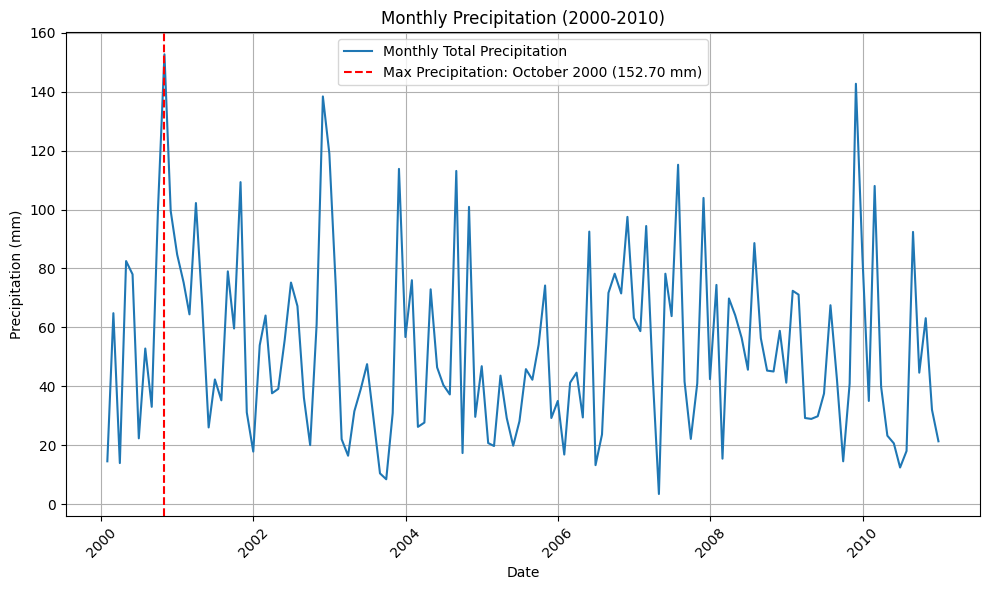

Max Precipitation occurred in October 2000 with 152.70 mm.


In [ ]:
import matplotlib.pyplot as plt

# Plot the precipitation data
plt.figure(figsize=(10, 6))
plt.plot(monthly_precipitation.index, monthly_precipitation, label='Monthly Total Precipitation')
plt.title('Monthly Precipitation (2000-2010)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)

# Add a vertical line at the date with the maximum precipitation
plt.axvline(x=max_precipitation_date, color='r', linestyle='--', label=f'Max Precipitation: {max_precipitation_date.strftime("%B %Y")} ({max_precipitation_value:.2f} mm)')

# Add a legend
plt.legend()

# Format the plot for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Output the date and value for the max precipitation (for reference)
print(f"Max Precipitation occurred in {max_precipitation_date.strftime('%B %Y')} with {max_precipitation_value:.2f} mm.")


> Correction for Major Locator and Minor Locator

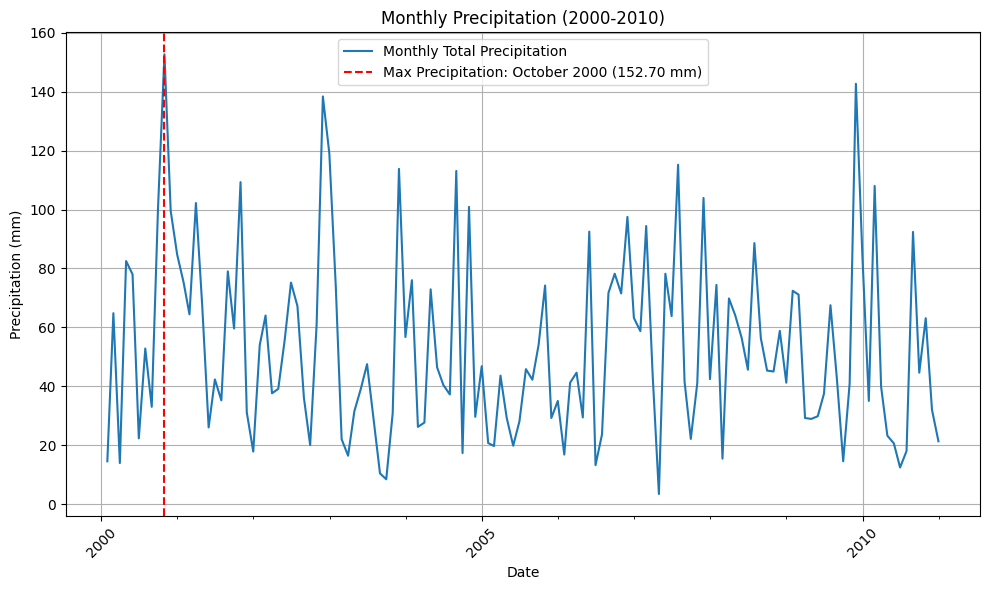

Max Precipitation occurred in October 2000 with 152.70 mm.


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Import mdates

# Plot the precipitation data
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axes
ax.plot(monthly_precipitation.index, monthly_precipitation, label='Monthly Total Precipitation')  # Plot on the axes
ax.set_title('Monthly Precipitation (2000-2010)')  # Set title on the axes
ax.set_xlabel('Date')  # Set x-label on the axes
ax.set_ylabel('Precipitation (mm)')  # Set y-label on the axes
ax.grid(True)  # Enable grid on the axes

ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Every 5 year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 4-digit year format
plt.tick_params(axis='x', rotation=90)

ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Every 1 year
# ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y'))  # 4-digit year format
# plt.tick_params(axis='x', rotation=90)


# Add a vertical line at the date with the maximum precipitation
ax.axvline(x=max_precipitation_date, color='r', linestyle='--', label=f'Max Precipitation: {max_precipitation_date.strftime("%B %Y")} ({max_precipitation_value:.2f} mm)')

# Add a legend
ax.legend()

# Format the plot for better visibility
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Output the date and value for the max precipitation (for reference)
print(f"Max Precipitation occurred in {max_precipitation_date.strftime('%B %Y')} with {max_precipitation_value:.2f} mm.")

> WRONG PLOTTING

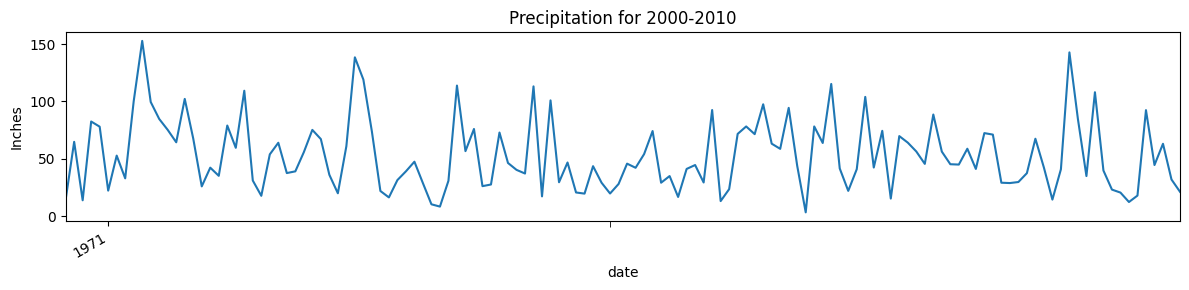

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 3))
monthly_precipitation.plot(ax=ax)

ax.set_title('Precipitation for 2000-2010')
ax.set_ylabel('Inches')

ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Every 1 year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 4-digit year format
ax.tick_params(axis='x', rotation=90)  # Rotate major ticks' labels 90 degrees

ax.xaxis.set_minor_locator(mdates.MonthLocator(3))  # Every 3 months
ax.tick_params(axis='x', which='minor', length=4)  # Make minor ticks visible but no labels

fig.autofmt_xdate()  # Automatically format the x-axis labels for better spacing

# Display the plot
plt.tight_layout()
plt.show()

Q2: Which year between 2000-2020 had the coolest average temperature?

In [ ]:
#Filter data betweem 2000 and 2010
temp_df_2 = df_filtered['2000-01-01':'2020-12-31']

In [ ]:
#Resample Data by Month
yearly_temperature = temp_df_2['mean_temp'].resample('YE').mean()

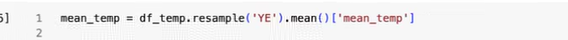

In [ ]:
yearly_temperature.index
print(type(yearly_temperature.index))  # This should now print <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [60]:
coolest_year = yearly_temperature.idxmin()  # Year with the coolest average temperature
coolest_temp = yearly_temperature.min()

print(f"The year with the coolest average temperature between 2000 and 2020 was {coolest_year.year},in {coolest_year.month}, {coolest_year.month_name()}, with an average temperature of {coolest_temp:.2f} degrees Celsius.")

The year with the coolest average temperature between 2000 and 2020 was 2010,in 12, December, with an average temperature of 10.66 degrees Celsius.


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:975: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


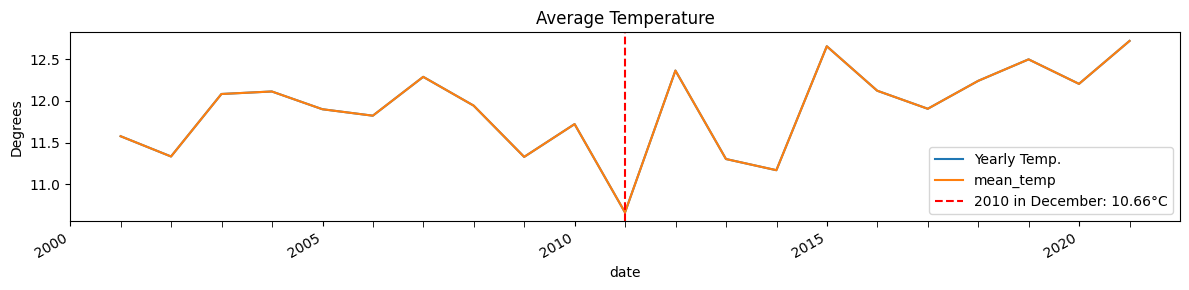

In [61]:
fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(yearly_temperature.index, yearly_temperature, label='Yearly Temp.')

# Plot the resampled data
yearly_temperature.plot(ax=ax)

# Set the title and y-label
ax.set_title('Average Temperature')
ax.set_ylabel('Degrees')

# Customize the major x-axis ticks (Every 5 years)
ax.xaxis.set_major_locator(mdates.YearLocator(5))  # Every 5 years
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 4-digit year format
ax.tick_params(axis='x', rotation=90)  # Rotate major ticks' labels 90 degrees

# Customize the minor x-axis ticks (Every 1 year)
ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # Every 1 year
ax.tick_params(axis='x', which='minor', length=4)  # Make minor ticks visible but no labels

# Add a vertical line at the year with the lowest average temperature
ax.axvline(x=coolest_year, color='r', linestyle='--', label=f'{coolest_year.year} in {coolest_year.month_name()}: {coolest_temp:.2f}°C')

ax.legend()

#Format the x-axis labels for better readability
fig.autofmt_xdate()
plt.tight_layout()
plt.show()